In [240]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# customer_demographics_df

In [243]:
customer_demographics_df = pd.read_csv("customer-demographics.csv")
analyze_dataset(customer_data)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452707 entries, 0 to 1452706
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   CUSTOMER_NUMBER  1452707 non-null  int64  
 1   GENDER           1452707 non-null  object 
 2   AGE              1447300 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.2+ MB


None


First few rows of the dataset:


,CUSTOMER_NUMBER,GENDER,AGE
0,13,F,48.0
1,32,F,60.0
2,102,F,61.0
3,145,F,67.0
4,158,F,59.0



Missing Value Counts and Percentages:


,col_name,missing_value_counts,missing_value_percentage
0,CUSTOMER_NUMBER,0,0.00
1,GENDER,0,0.00
2,AGE,5407,0.37


## CUSTOMER_NUMBER Analysis

In [244]:
if customer_demographics_df["CUSTOMER_NUMBER"].nunique() == len(customer_demographics_df):
    print("All customer numbers are unique")

customer_demographics_df["CUSTOMER_NUMBER"] = customer_demographics_df["CUSTOMER_NUMBER"].astype(str)

All customer numbers are unique


## GENDER Analysis

In [143]:
customer_demographics_df["GENDER"].value_counts()

F    1336980
M      84968
U      30759
Name: GENDER, dtype: int64

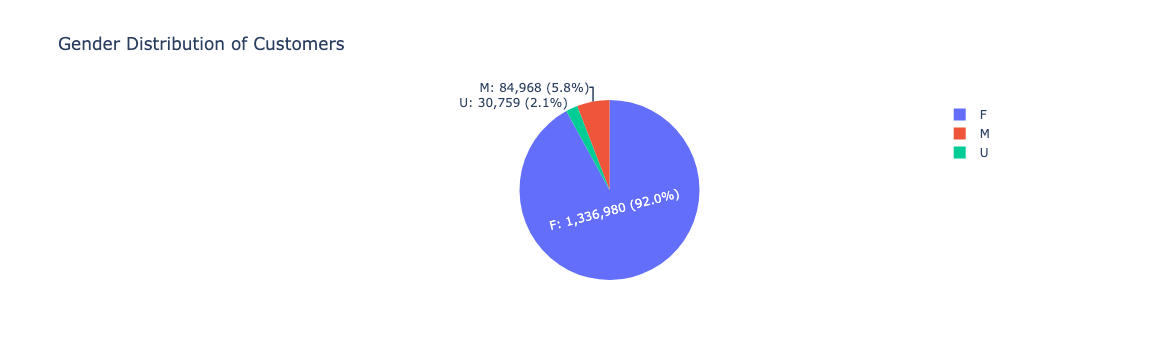

In [144]:
gender_counts = customer_demographics_df["GENDER"].value_counts()

fig = px.pie(
    names=gender_counts.index,
    values=gender_counts.values,
    title='Gender Distribution of Customers',
    labels={'names': 'Gender', 'values': 'Count'}
)

fig.update_traces(
    textinfo='label+percent',
    texttemplate='%{label}: %{value} (%{percent:.1%})'
)

fig.update_layout(showlegend=True)
fig.show()

## AGE Analysis

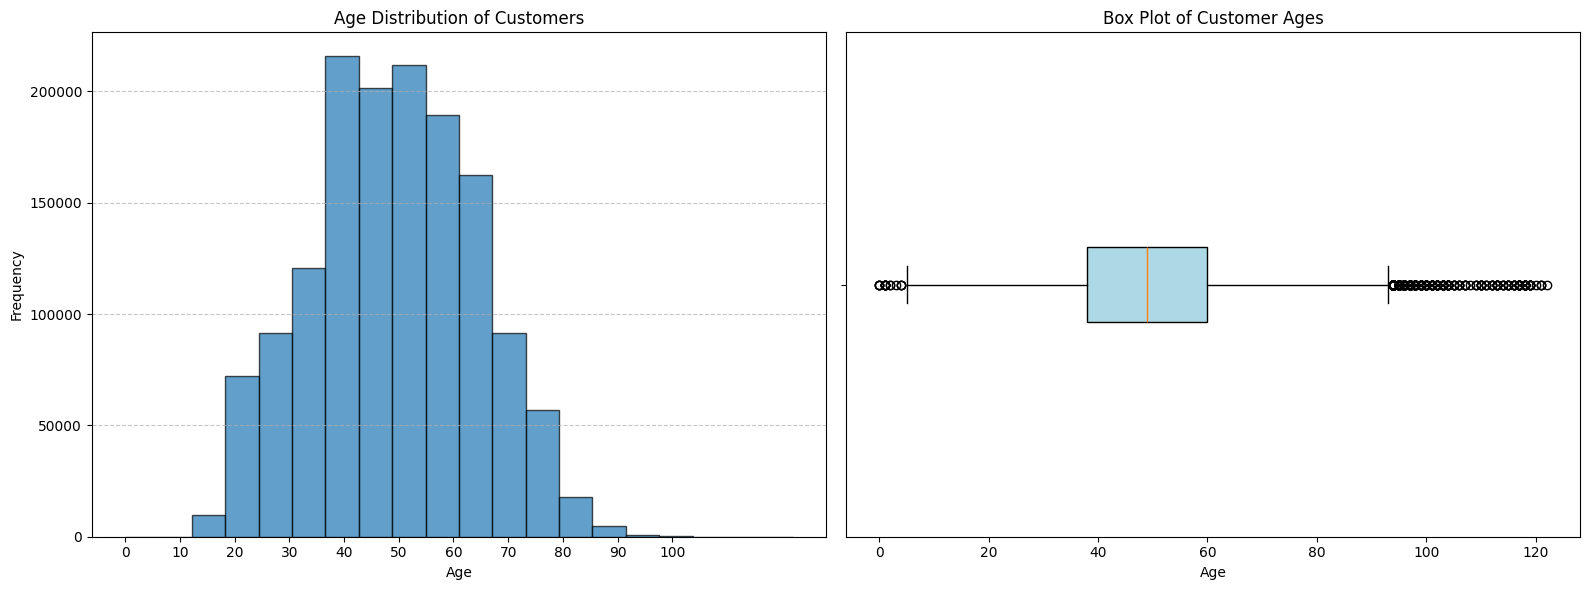

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axes[0].hist(customer_demographics_df["AGE"].dropna(), bins=20, edgecolor='k', alpha=0.7)
axes[0].set_title('Age Distribution of Customers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks(range(0, 101, 10)) 

axes[1].boxplot(customer_demographics_df["AGE"].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title('Box Plot of Customer Ages')
axes[1].set_xlabel('Age')
axes[1].set_yticklabels([''])  
plt.tight_layout()
plt.show()

In [154]:
customer_demographics_df[customer_demographics_df["AGE"].isnull()]["GENDER"].value_counts()

F    4970
M     374
U      63
Name: GENDER, dtype: int64

In [155]:
round(customer_demographics_df.groupby(["GENDER"])["AGE"].mean(),0)

GENDER
F    49.0
M    47.0
U    53.0
Name: AGE, dtype: float64

In [156]:
customer_demographics_df.groupby(["GENDER"])["AGE"].median()

GENDER
F    49.0
M    46.0
U    54.0
Name: AGE, dtype: float64

# Media Data

In [236]:
media_data = pd.read_csv("media-exposure-by-customer.csv")

analyze_dataset(media_data)

display(media_data[media_data["CUSTOMER_NUMBER"].isnull()])

media_data.dropna(inplace = True)

media_data['CUSTOMER_NUMBER'] = media_data['CUSTOMER_NUMBER'].astype(int).astype(str)

display(media_data.duplicated().sum())

media_data.drop_duplicates(inplace = True)

media_data.reset_index(drop =True, inplace = True)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197486 entries, 0 to 2197485
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CUSTOMER_NUMBER        float64
 1   RECEIVED_OR_SAW_MEDIA  object 
dtypes: float64(1), object(1)
memory usage: 33.5+ MB


None


First few rows of the dataset:


,CUSTOMER_NUMBER,RECEIVED_OR_SAW_MEDIA
0,704306.0,APP HOMEPAGE
1,676786.0,APP HOMEPAGE
2,293452.0,APP HOMEPAGE
3,455955.0,APP HOMEPAGE
4,1068652.0,APP HOMEPAGE



Missing Value Counts and Percentages:


,col_name,missing_value_counts,missing_value_percentage
0,CUSTOMER_NUMBER,8,0.0
1,RECEIVED_OR_SAW_MEDIA,0,0.0


,CUSTOMER_NUMBER,RECEIVED_OR_SAW_MEDIA
82516,NaN,EMAIL
621986,NaN,APP HOMEPAGE
651820,NaN,APP PUSH
779528,NaN,APP PUSH
779533,NaN,APP PUSH
968844,NaN,APP INBOX
1454262,NaN,APP INBOX
1484053,NaN,APP INBOX


47567

In [237]:
media_data.shape

(2149911, 2)

In [238]:
media_data["CUSTOMER_NUMBER"].nunique()

1460895

# Transaction Data

In [245]:
transaction_data = pd.read_csv("transaction-data.csv")
analyze_dataset(transaction_data)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460895 entries, 0 to 1460894
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   CUSTOMER_NUMBER     1460895 non-null  int64  
 1   BRAND_SALES         57740 non-null    float64
 2   BRAND_UNITS         57740 non-null    float64
 3   BRAND_TRANSACTIONS  57740 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 44.6 MB


None


First few rows of the dataset:


,CUSTOMER_NUMBER,BRAND_SALES,BRAND_UNITS,BRAND_TRANSACTIONS
0,208356,5.00,1.0,1.0
1,208,16.50,1.0,1.0
2,216,57.75,2.0,2.0
3,1518,19.00,1.0,1.0
4,1974,14.00,1.0,1.0



Missing Value Counts and Percentages:


,col_name,missing_value_counts,missing_value_percentage
0,CUSTOMER_NUMBER,0,0.00
1,BRAND_SALES,1403155,96.05
2,BRAND_UNITS,1403155,96.05
3,BRAND_TRANSACTIONS,1403155,96.05


In [248]:
transaction_data.fillna(0, inplace = True)

transaction_data['CUSTOMER_NUMBER'] = transaction_data['CUSTOMER_NUMBER'].astype(str)

display(transaction_data.duplicated().sum())

0

In [249]:
transaction_data["CUSTOMER_NUMBER"].nunique()

1460895

In [255]:
data = transaction_data.merge(customer_demographics_df, on = "CUSTOMER_NUMBER", how = "outer")

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461885 entries, 0 to 1461884
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   CUSTOMER_NUMBER     1461885 non-null  object 
 1   BRAND_SALES         1460895 non-null  float64
 2   BRAND_UNITS         1460895 non-null  float64
 3   BRAND_TRANSACTIONS  1460895 non-null  float64
 4   GENDER              1452707 non-null  object 
 5   AGE                 1447300 non-null  float64
dtypes: float64(4), object(2)
memory usage: 78.1+ MB


In [257]:
analyze_dataset(data)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461885 entries, 0 to 1461884
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   CUSTOMER_NUMBER     1461885 non-null  object 
 1   BRAND_SALES         1460895 non-null  float64
 2   BRAND_UNITS         1460895 non-null  float64
 3   BRAND_TRANSACTIONS  1460895 non-null  float64
 4   GENDER              1452707 non-null  object 
 5   AGE                 1447300 non-null  float64
dtypes: float64(4), object(2)
memory usage: 78.1+ MB


None


First few rows of the dataset:


,CUSTOMER_NUMBER,BRAND_SALES,BRAND_UNITS,BRAND_TRANSACTIONS,GENDER,AGE
0,208356,5.00,1.0,1.0,F,70.0
1,208,16.50,1.0,1.0,F,86.0
2,216,57.75,2.0,2.0,F,62.0
3,1518,19.00,1.0,1.0,F,55.0
4,1974,14.00,1.0,1.0,F,63.0



Missing Value Counts and Percentages:


,col_name,missing_value_counts,missing_value_percentage
0,CUSTOMER_NUMBER,0,0.00
1,BRAND_SALES,990,0.07
2,BRAND_UNITS,990,0.07
3,BRAND_TRANSACTIONS,990,0.07
4,GENDER,9178,0.63
5,AGE,14585,1.00


In [259]:
full_data = data.merge(media_data, on = "CUSTOMER_NUMBER", how = "outer")

In [261]:
analyze_dataset(full_data)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150901 entries, 0 to 2150900
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CUSTOMER_NUMBER        object 
 1   BRAND_SALES            float64
 2   BRAND_UNITS            float64
 3   BRAND_TRANSACTIONS     float64
 4   GENDER                 object 
 5   AGE                    float64
 6   RECEIVED_OR_SAW_MEDIA  object 
dtypes: float64(4), object(3)
memory usage: 131.3+ MB


None


First few rows of the dataset:


,CUSTOMER_NUMBER,BRAND_SALES,BRAND_UNITS,BRAND_TRANSACTIONS,GENDER,AGE,RECEIVED_OR_SAW_MEDIA
0,208356,5.00,1.0,1.0,F,70.0,STORE TAKEOVER
1,208,16.50,1.0,1.0,F,86.0,EMAIL
2,208,16.50,1.0,1.0,F,86.0,APP PUSH
3,208,16.50,1.0,1.0,F,86.0,APP INBOX
4,216,57.75,2.0,2.0,F,62.0,EMAIL



Missing Value Counts and Percentages:


,col_name,missing_value_counts,missing_value_percentage
0,CUSTOMER_NUMBER,0,0.00
1,BRAND_SALES,990,0.05
2,BRAND_UNITS,990,0.05
3,BRAND_TRANSACTIONS,990,0.05
4,GENDER,9195,0.43
5,AGE,14760,0.69
6,RECEIVED_OR_SAW_MEDIA,990,0.05


In [262]:
full_data["GENDER"].value_counts()

F    1985317
M     110650
U      45739
Name: GENDER, dtype: int64

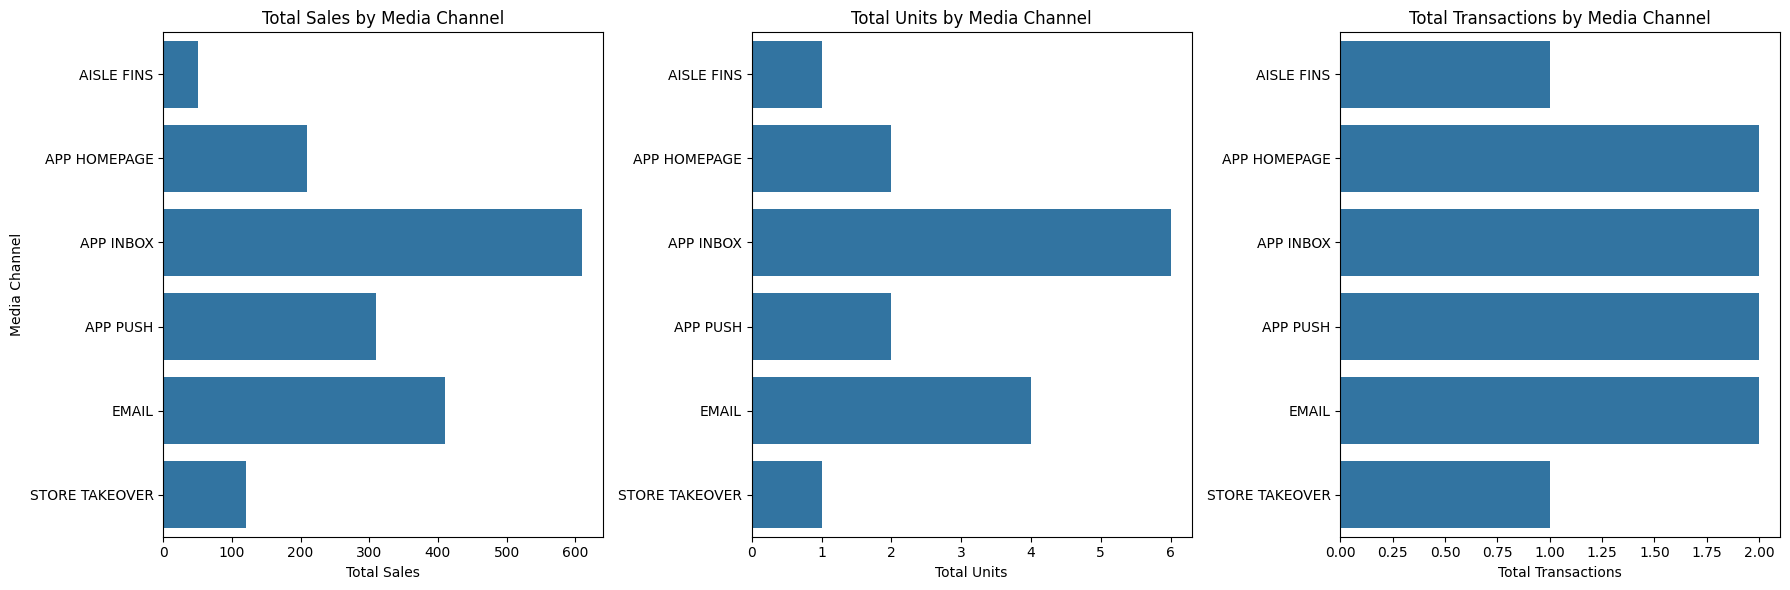

/var/folders/g9/lb5pmg2x339cysl1j3dl07y40000gn/T/ipykernel_1030/2366868922.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Media Channel', data=sales_effectiveness, palette='viridis')


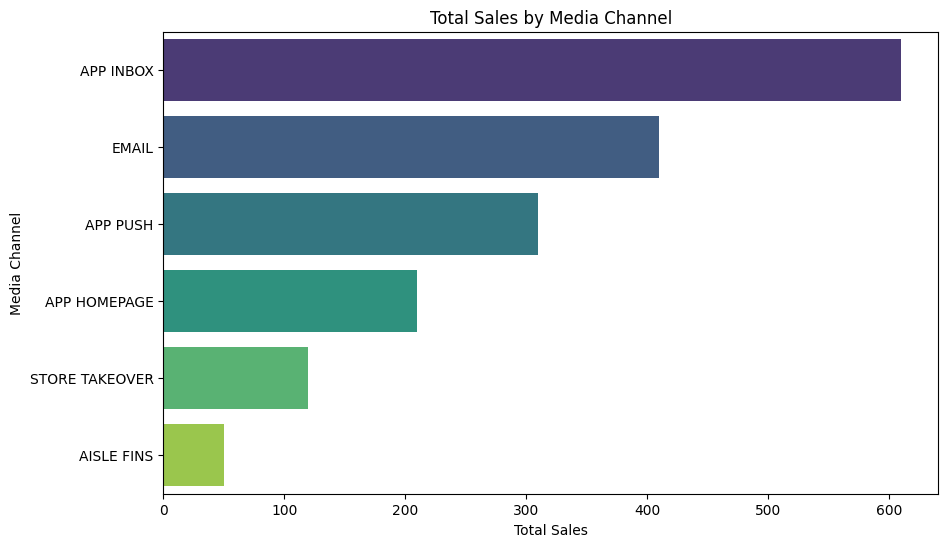

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (replace this with your actual media_exposure and transaction_data DataFrame)
media_exposure = pd.DataFrame({
    'CUSTOMER_NUMBER': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'RECEIVED_OR_SAW_MEDIA': ['APP HOMEPAGE', 'EMAIL', 'APP PUSH', 'APP INBOX', 'AISLE FINS', 'STORE TAKEOVER', 'APP HOMEPAGE', 'EMAIL', 'APP PUSH', 'APP INBOX']
})

transaction_data = pd.DataFrame({
    'CUSTOMER_NUMBER': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'BRAND_SALES': [100, 200, 150, 300, 50, 120, 110, 210, 160, 310],
    'BRAND_UNITS': [1, 2, 1, 3, 1, 1, 1, 2, 1, 3],
    'BRAND_TRANSACTIONS': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
})

# Merge the dataframes on CUSTOMER_NUMBER
merged_data = pd.merge(media_exposure, transaction_data, on='CUSTOMER_NUMBER')

# Question 1: Patterns between media exposure and purchase behavior
patterns_data = merged_data.groupby('RECEIVED_OR_SAW_MEDIA').agg({
    'BRAND_SALES': ['sum', 'mean'],
    'BRAND_UNITS': ['sum', 'mean'],
    'BRAND_TRANSACTIONS': ['sum', 'mean']
}).reset_index()

patterns_data.columns = ['Media Channel', 'Total Sales', 'Average Sales', 'Total Units', 'Average Units', 'Total Transactions', 'Average Transactions']

# Visualization for Question 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.barplot(x='Total Sales', y='Media Channel', data=patterns_data, ax=axes[0])
axes[0].set_title('Total Sales by Media Channel')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Media Channel')

sns.barplot(x='Total Units', y='Media Channel', data=patterns_data, ax=axes[1])
axes[1].set_title('Total Units by Media Channel')
axes[1].set_xlabel('Total Units')
axes[1].set_ylabel('')

sns.barplot(x='Total Transactions', y='Media Channel', data=patterns_data, ax=axes[2])
axes[2].set_title('Total Transactions by Media Channel')
axes[2].set_xlabel('Total Transactions')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

# Question 3: Effectiveness of media channels in driving sales
sales_effectiveness = merged_data.groupby('RECEIVED_OR_SAW_MEDIA')['BRAND_SALES'].sum().reset_index()
sales_effectiveness.columns = ['Media Channel', 'Total Sales']
sales_effectiveness = sales_effectiveness.sort_values(by='Total Sales', ascending=False)

# Visualization for Question 3
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Sales', y='Media Channel', data=sales_effectiveness, palette='viridis')
plt.title('Total Sales by Media Channel')
plt.xlabel('Total Sales')
plt.ylabel('Media Channel')
plt.show()
